<a href="https://colab.research.google.com/github/deven367/thesis/blob/main/time_series_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ap_iliad = [218,533,686,861,1172,1367,1533,1751,1997,2152,2422,2564,2834,3006,3268,3565,3802,4003,4136,4296,4516,4744,5037]

In [ ]:
chapman_iliad = [167,369,482,593,785,910,1020,1150,1343,1483,1718,1818,2031,2154,2337,2536,2707,2877,3000,3150,3339,3476,3768]

In [ ]:
butler_iliad = [190,474,593,732,987,1128,1243,1392,1597,1753,1962,2075,2279,2409,2612,2850,3027,3190,3292,3437,3612,3736,3976]

In [ ]:
lang_iliad = [157,419,541,679,840,924,1034,1154,1295,1435,1566,1673,1900,1998,2072,2247,2368,2522,2638,2773,2931,3070,3285]

In [ ]:
prev = 0
for i in range(len(ap_iliad)):
    st = 0
    if i > 0:
        st = ap_iliad[i-1]
    print('Book', i + 1 , ': start', st, 'end', ap_iliad[i], 'length:', ap_iliad[i] - st)

Book 1 : start 0 end 218 length: 218
Book 2 : start 218 end 533 length: 315
Book 3 : start 533 end 686 length: 153
Book 4 : start 686 end 861 length: 175
Book 5 : start 861 end 1172 length: 311
Book 6 : start 1172 end 1367 length: 195
Book 7 : start 1367 end 1533 length: 166
Book 8 : start 1533 end 1751 length: 218
Book 9 : start 1751 end 1997 length: 246
Book 10 : start 1997 end 2152 length: 155
Book 11 : start 2152 end 2422 length: 270
Book 12 : start 2422 end 2564 length: 142
Book 13 : start 2564 end 2834 length: 270
Book 14 : start 2834 end 3006 length: 172
Book 15 : start 3006 end 3268 length: 262
Book 16 : start 3268 end 3565 length: 297
Book 17 : start 3565 end 3802 length: 237
Book 18 : start 3802 end 4003 length: 201
Book 19 : start 4003 end 4136 length: 133
Book 20 : start 4136 end 4296 length: 160
Book 21 : start 4296 end 4516 length: 220
Book 22 : start 4516 end 4744 length: 228
Book 23 : start 4744 end 5037 length: 293


In [ ]:
ap_ody = [150,311,496,729,907,1014,1144,1283,1464,1689,1903,2098,2267,2437,3586,2744,2947,3078,3238,3355,3503,3632,3750]
bl_ody = [142,277,446,701,863,973,1078,1242,1419,1613,1796,1943,2083,2254,2445,2594,2771,2907,3073,3198,3325,3440,3550]
wc_ody = [190,358,548,897,1086,1223,1352,1582,1808,2056,2314,2481,2656,2849,3086,3295,3580,3765,4032,4210,4385,4577,4727]

In [ ]:
embeddings = np.load('alex pope iliad_cleaned_dcltr_base.npy')

In [ ]:
embeddings.shape

(5335, 768)

In [ ]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

In [ ]:
successive_ap = []
for i in range(len(embeddings) - 1):
    successive_ap.append(cos_sim(embeddings[i], embeddings[i+1]))

In [ ]:
def time_series(successive, breakpoints, fname = None):
    st = 0
    for i in range(len(breakpoints)):
        plt.figure()
        if i > 0:
            st = breakpoints[i-1]
        x = [j for j in range(breakpoints[i] - st)]
        if i == 0:
            y = successive[:breakpoints[i]]
        else:
            y = successive[breakpoints[i-1] : breakpoints[i]]
        # print(len(x), len(y))
        # print(y)
        plt.xlabel('Book %d'  %(i+1))
        plt.plot(x, y)
        # plt.savefig(fname[:-7] + 'Book %d time series'  %(i+1) +'.png', dpi = 300)
    
    plt.figure()
    temp = len(successive[breakpoints[-1]:])
    x = [j for j in range(temp)]
    y = successive[breakpoints[-1]:]
    # print(len(x), len(y))
    plt.xlabel('Book %d'  %(i+2))
    plt.plot(x, y)
    # plt.savefig(fname[:-7] + 'Book %d time series'  %(i+2) +'.png', dpi = 300)

# plt.figure(figsize=(10,10))
# # plt.scatter(l[:227], successive[:227])
# plt.plot(l[:227], successive_ap[:227])
# plt.plot([227,0],[0,0], c = 'black')

In [ ]:
plt.figure(max)

In [ ]:
def phase_plots(successive, breakpoints, fname = None):
    st = 0
    for i in range(len(breakpoints)):
        plt.figure()
        if i == 0:
            x = successive[ : breakpoints[i] -1 ]
            y = successive[1: breakpoints[i]] 
            plt.xlabel('Book %d'  %(i+1))
            plt.plot(x, y)
        else:
            x = successive[breakpoints[i - 1] :  breakpoints[i] - 1]
            y = successive[breakpoints[i - 1] + 1: breakpoints[i]]
            plt.xlabel('Book %d'  %(i+1))
            plt.plot(x, y)
            plt.savefig(fname[:-7] + 'Book ' + (i+1)+ 'phase.png', dpi = 300)

    
    plt.figure()
    x = successive[breakpoints[-1]: -1]
    y = successive[breakpoints[-1] + 1 :  ]
    # print(len(x), len(y))
    plt.xlabel('Book %d'  %(i+2))
    plt.plot(x, y)
    # plt.savefig(fname[:-7] + 'Book %d phase'  %(i+2) +'.png', dpi = 300)

In [ ]:
def create_ts_phase(embeddings, fname):
    successive = []
    for i in range(len(embeddings) - 1):
        successive.append(cos_sim(embeddings[i], embeddings[i+1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


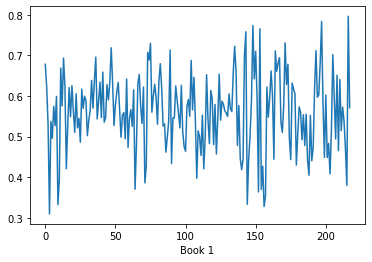

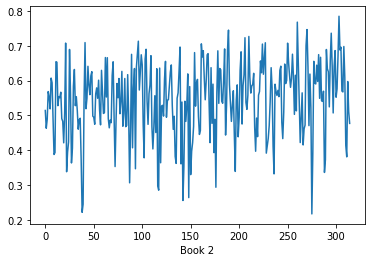

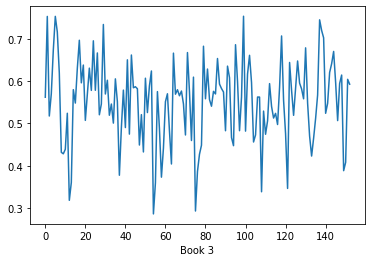

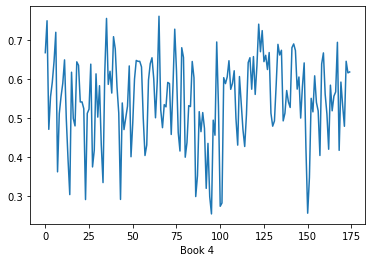

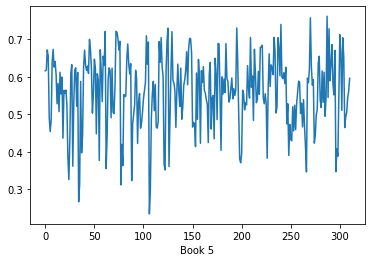

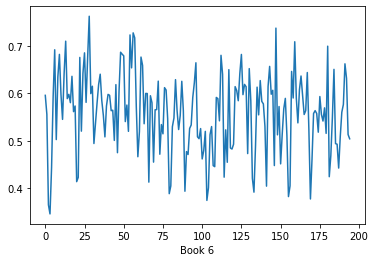

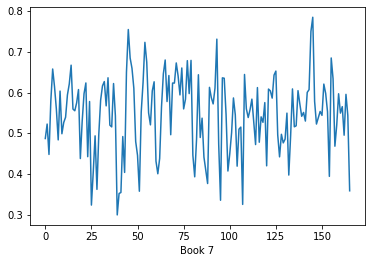

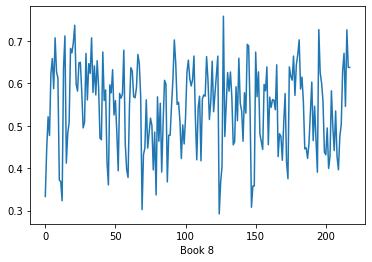

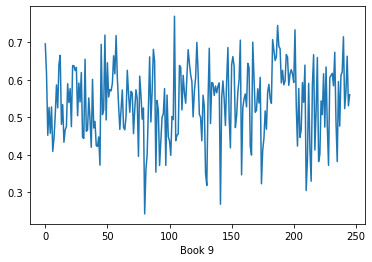

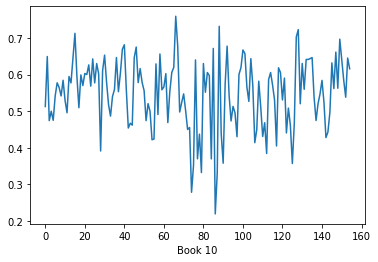

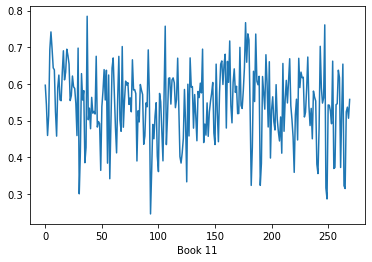

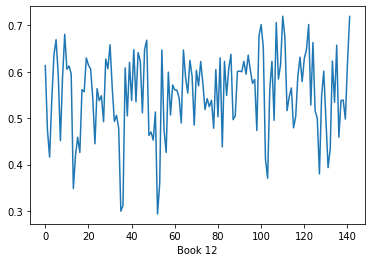

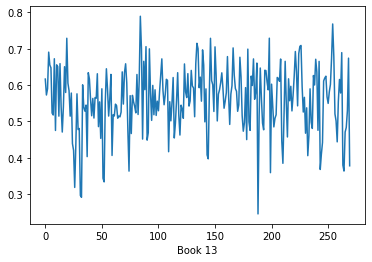

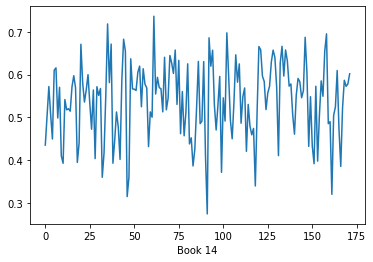

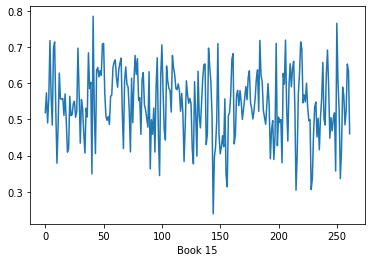

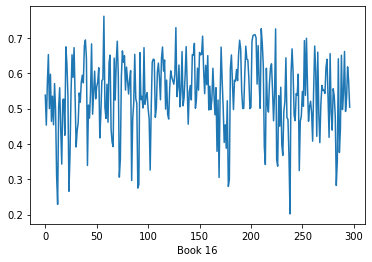

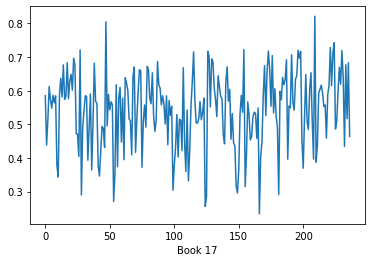

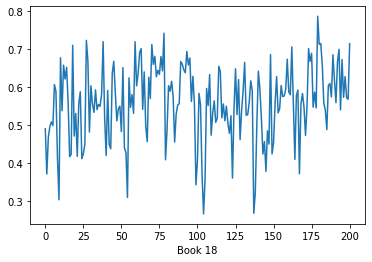

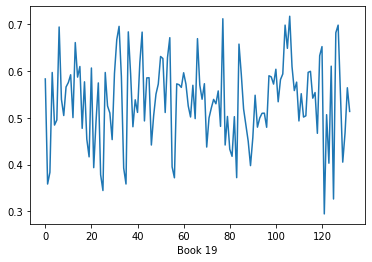

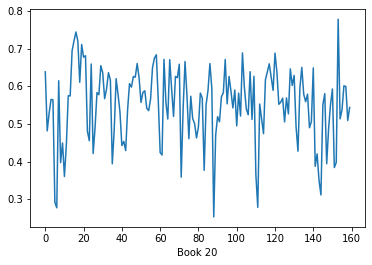

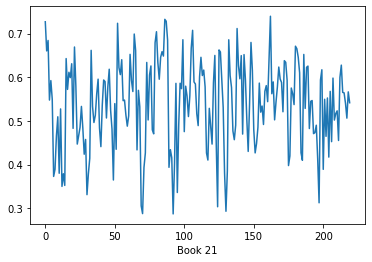

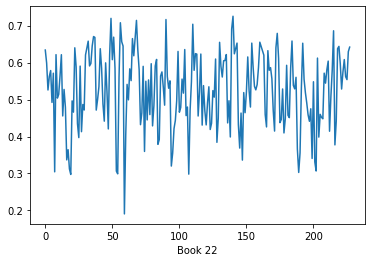

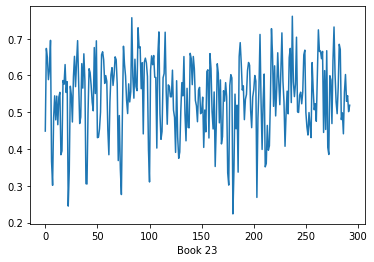

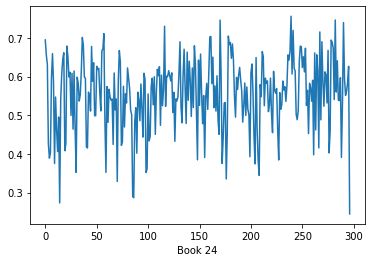

In [ ]:
time_series(successive_ap, ap_iliad)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


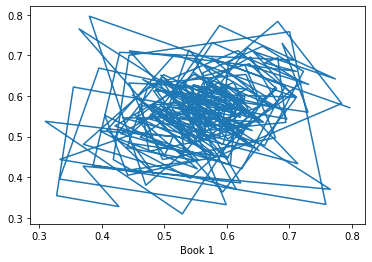

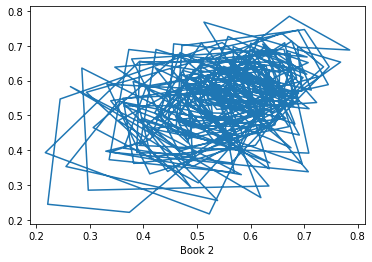

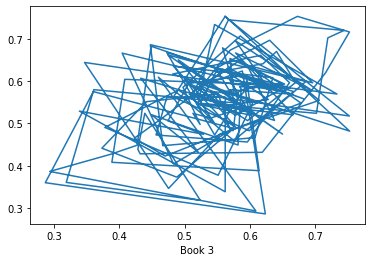

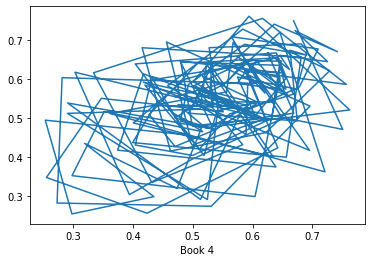

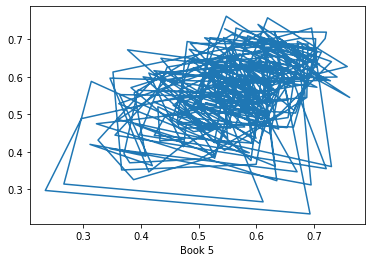

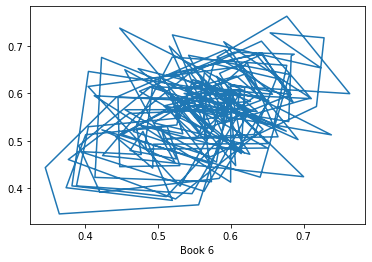

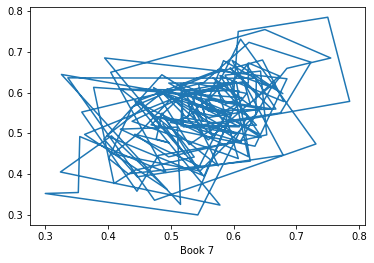

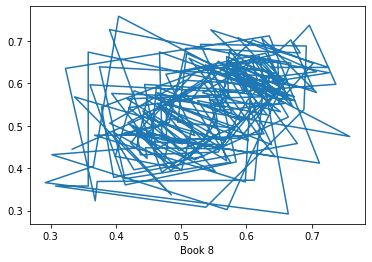

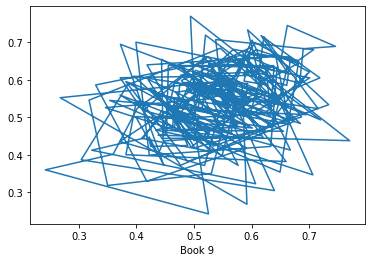

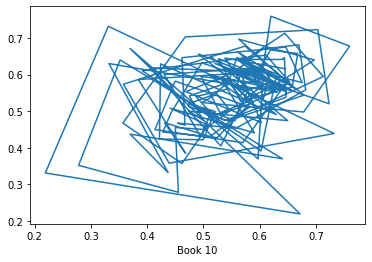

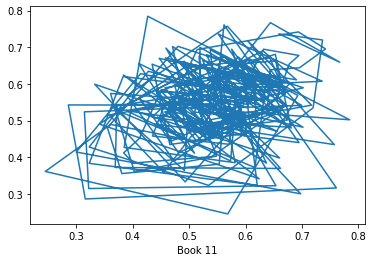

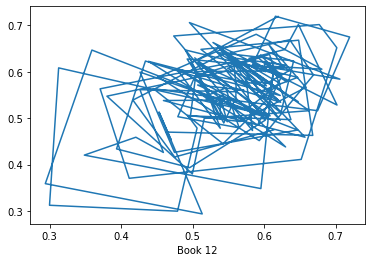

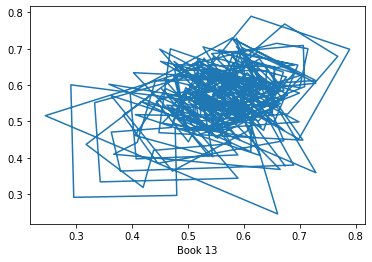

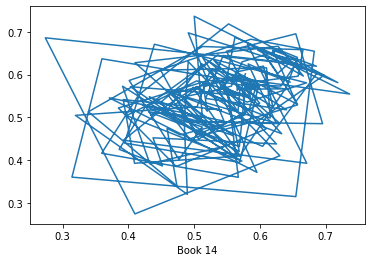

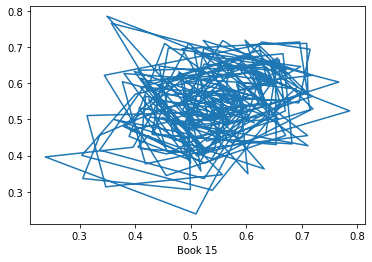

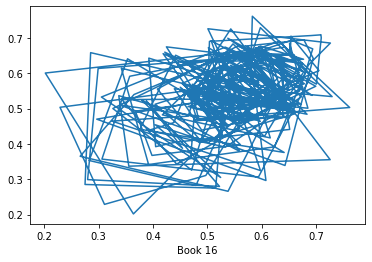

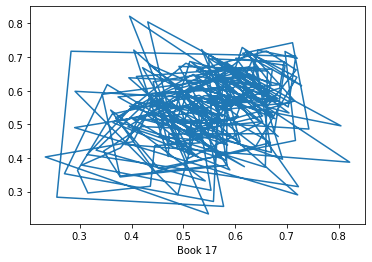

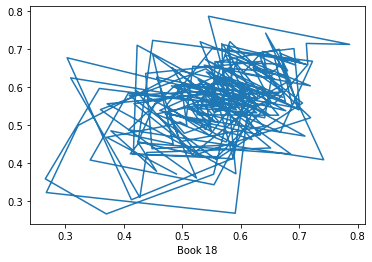

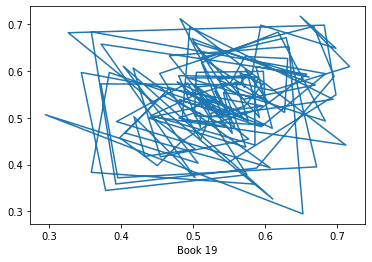

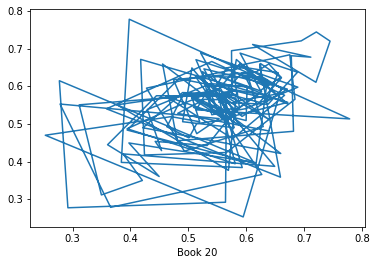

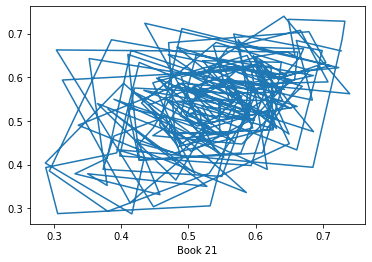

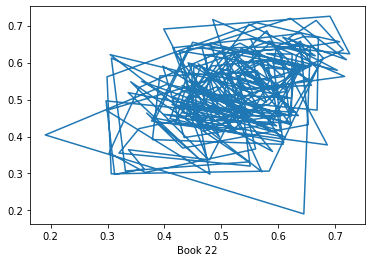

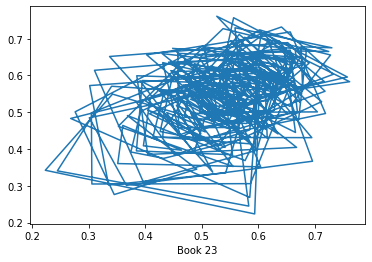

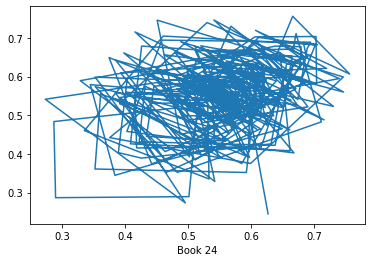

In [ ]:
phase_plots(successive_ap, ap_iliad)

In [ ]:
len(embeddings)
len(successive_ap)

5547

In [ ]:
l = [i for i in range(len(successive_ap))]

In [ ]:
a = successive_ap

In [ ]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

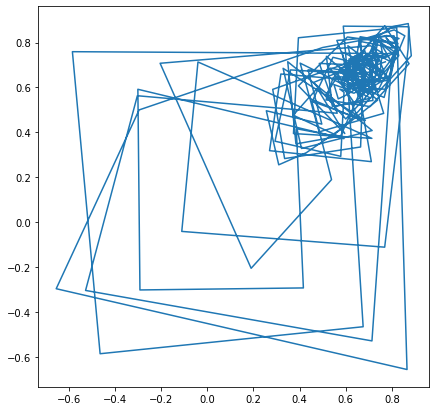

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(a[:226], a[1:227])
plt.savefig('phase_plot.png', dpi = 300)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(l, columns=['x'])

In [ ]:
df['y'] = successive_ap

In [ ]:
df

,x,y
0,0,0.771854
1,1,0.714185
2,2,0.693461
3,3,0.731405
4,4,0.813351
...,...,...
5542,5542,0.776958
5543,5543,0.655016
5544,5544,0.663956
5545,5545,0.676058


In [ ]:
mat = np.matrix(df) 

In [ ]:
mat.shape

(5547, 2)

In [ ]:
mat[:,0][:200]

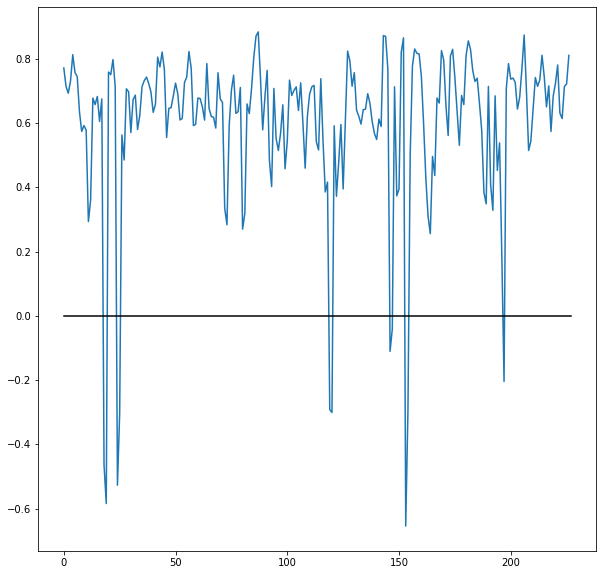

In [ ]:
plt.figure(figsize=(10,10))
# plt.scatter(l[:227], successive[:227])
plt.plot(l[:227], successive_ap[:227])
plt.plot([227,0],[0,0], c = 'black')

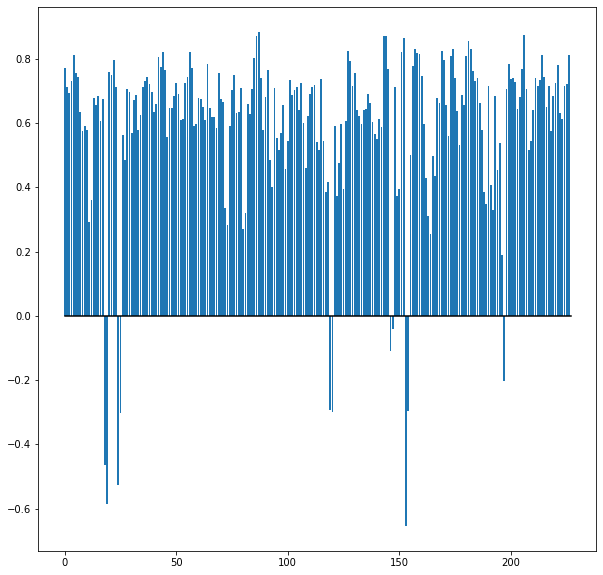

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(l[:227], successive[:227])
# plt.plot(l[:227], successive[:227])
plt.plot([227,0],[0,0], c = 'black')

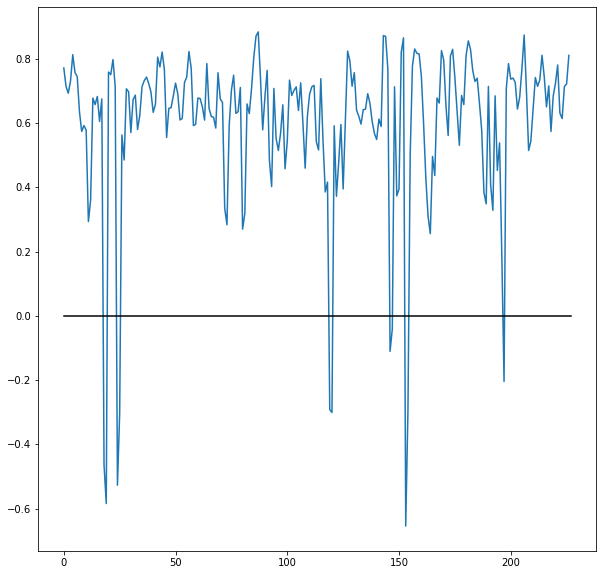

In [ ]:
plt.figure(figsize=(10,10))
# sns.scatterplot(x = 'x', y = 'y', data = df[:227])
plt.plot(mat[:,0][:227], mat[:,1][:227])
plt.plot([227,0],[0,0], c = 'black')
plt.savefig('ap_iliad_book1_ts.png', dpi = 300)

In [ ]:
# book2 begins at 227
ap_iliad = embeddings

# book2 begins at 167
gc_iliad = np.load('george chapman iliad__if_glove.npy')

In [ ]:
print(cos(ap_iliad[:227], gc_iliad[:167]).shape)

(227, 167)


In [ ]:
def plot_heatmap(embeddings, fname):
    cmp = newcmp(0,0,256)
    sns.heatmap(cosine_similarity(embeddings, embeddings) ,square=True, cmap='hot', vmin=0, vmax = 1)
    # plt.show()
    # inp = input('Do you have want to save the figure? ')
    # if inp == 'y' or inp == 'Y':
    plt.savefig(fname+'.png', dpi = 300)
    plt.clf()

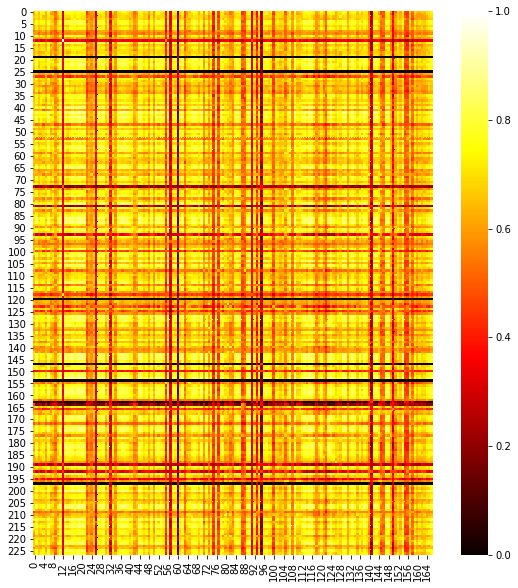

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cos(ap_iliad[:227], gc_iliad[:167]) ,square=True, cmap='hot', vmin=0, vmax = 1)
plt.savefig('book1_alexpope_vs_gc'+'.png', dpi = 300)

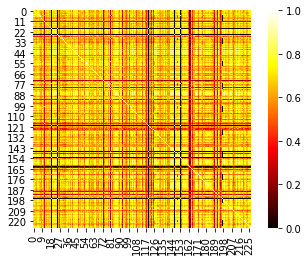

In [ ]:
ap_book1_hm = sns.heatmap(cos(ap_iliad[:227], ap_iliad[:227]) ,square=True, cmap='hot', vmin=0, vmax = 1)
plt.savefig('ap_book1_hm.png', dpi = 300)

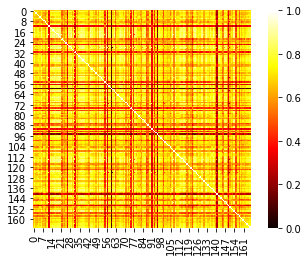

In [ ]:
gc_book1_hm = sns.heatmap(cos(gc_iliad[:167], gc_iliad[:167]) ,square=True, cmap='hot', vmin=0, vmax = 1)
plt.savefig('gc_book1_hm.png', dpi = 300)

In [ ]:
successive_gc = []
for i in range(len(gc_iliad) - 1):
    successive_gc.append(cos_sim(gc_iliad[i], gc_iliad[i+1]))

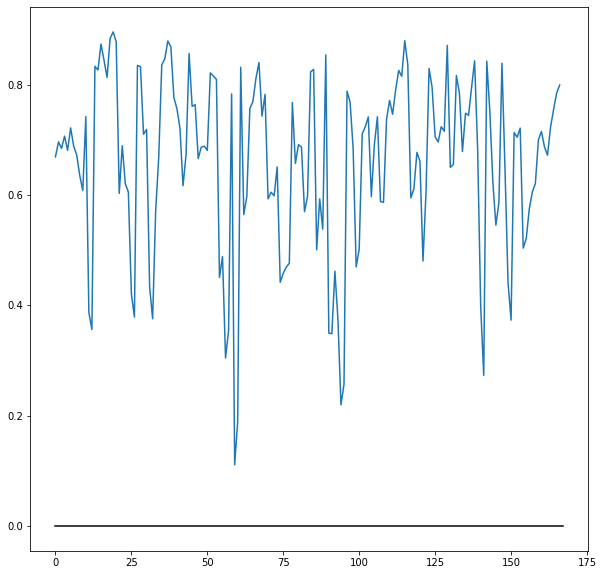

In [ ]:
plt.figure(figsize=(10,10))
# sns.scatterplot(l[:167], successive_gc[:167])
# plt.plot(mat[:,0][:227], mat[:,1][:227])
plt.plot(l[:167], successive_gc[:167])
plt.plot([167,0],[0,0], c = 'black')
plt.savefig('gc_iliad_book1_ts.png', dpi = 300)

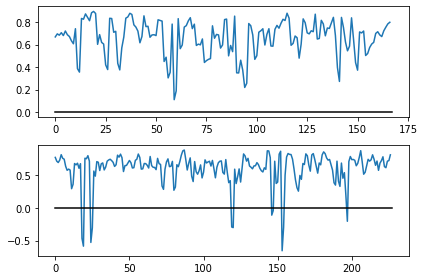

In [ ]:
fig2,axes2 = plt.subplots(2,1)
axes2[0].plot(l[:167], successive_gc[:167])
axes2[0].plot([167,0],[0,0], c = 'black')


axes2[1].plot(l[:227], successive_ap[:227])
axes2[1].plot([227,0],[0,0], c = 'black')
plt.tight_layout()

plt.savefig('ap_vs_gc_book1_ts.png', dpi = 300)

TypeError: ignored

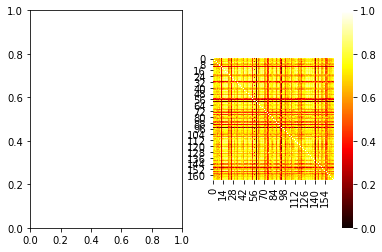

In [ ]:
fig,axes = plt.subplots(1,2)
axes[0].plot(sns.heatmap(cos(gc_iliad[:167], gc_iliad[:167]) ,square=True, cmap='hot', vmin=0, vmax = 1))
axes[1].plot(sns.heatmap(cos(ap_iliad[:227], ap_iliad[:227]) ,square=True, cmap='hot', vmin=0, vmax = 1))